In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import scipy
import glob

In [34]:
def fft_correl(x,y):
    """ 2D correlation, using FFT"""
    interval = np.size(x)
    fr = np.fft.fft(x, n=2*interval-1)
    fr2 = np.fft.fft(y[::-1], n=2*interval-1)
    return np.real(np.fft.ifft(fr*fr2, n=2*interval-1))

In [76]:
def thermlization(multiplier, Nontrivial=False):
    width = 3*multiplier
    height= 2*multiplier
    string = 'therm/N_flippable'
    if Nontrivial: string += 'Nontrivial'
    string += str(width) + 'by' + str(height) + '.dat'
    rhos = pd.read_csv(string, header=None, skiprows=1).to_numpy() / (width*height)
    print(str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    return np.average(rhos, axis=0)

def autocorrelation(multiplier, cutoff, Nontrivial=False):
    width = 3*multiplier
    height= 2*multiplier
    string = 'autoc/N_flippable'
    if Nontrivial: string += "Nontrivial"
    string += str(width) + 'by' + str(height) + '.dat'
    rhos = pd.read_csv(string, header=None, skiprows=1).to_numpy() / (width*height)
    print(str(np.shape(rhos)[0]) + " runs, each of " + str(np.shape(rhos)[1]-1) + " steps")
    interval = np.shape(rhos)[1] - 1

    result = np.zeros(2*(interval-cutoff)+1)
    for rho in rhos:
        data = rho[cutoff:]
        x = data - np.mean(data)
        result += np.correlate(x, x, mode='full')
    return result[interval-cutoff:]/len(rhos)/np.arange(1+interval-cutoff,0,-1)

multiplier 2 system: thermalization time 100, autoc time 75
4499 runs, each of 600 steps


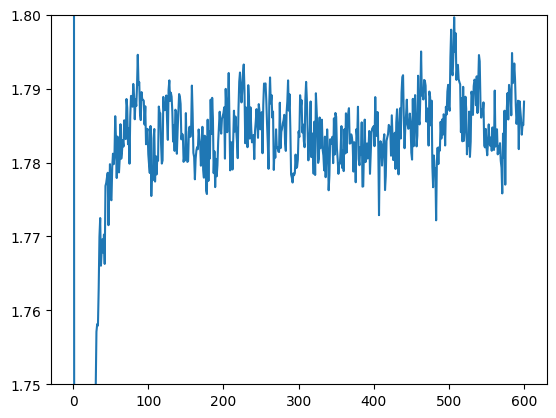

100 runs, each of 1000 steps


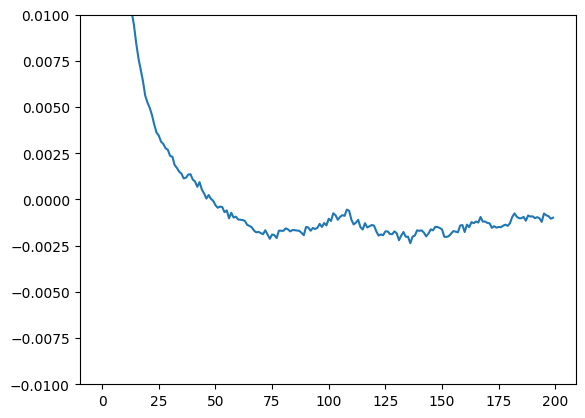

In [77]:
print("multiplier 2 system: thermalization time 100, autoc time 75")

rho_bar = thermlization(2)
plt.plot(rho_bar)
plt.ylim([1.75, 1.8])
plt.show()

result = autocorrelation(2, 100)
plt.plot(result[:200])
plt.ylim([-.01, .01])
plt.show()

multiplier 2 system Nontrivial: thermalization time 0, autoc time 0
100 runs, each of 1000 steps


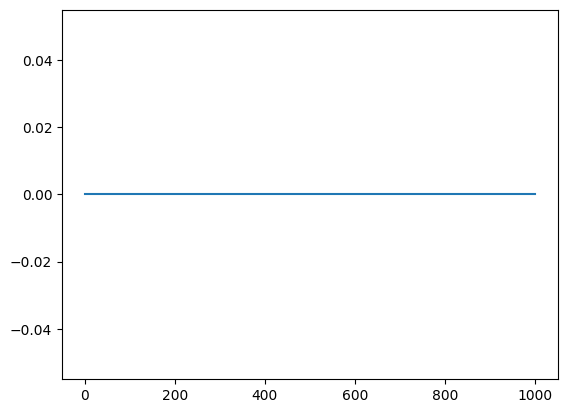

In [82]:
print("multiplier 2 system Nontrivial: thermalization time 0, autoc time 0")

rho_bar = thermlization(2, Nontrivial = True)
plt.plot(rho_bar)
# plt.ylim([1.75, 1.8])
plt.show()

# result = autocorrelation(2, 100, Nontrivial = True)
# plt.plot(result[:200])
# plt.ylim([-.01, .01])
# plt.show()

multiplier 3 system: thermalization time 200, autoc time 75
499 runs, each of 600 steps


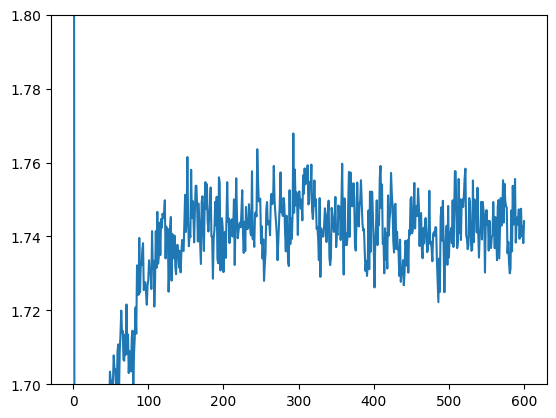

100 runs, each of 600 steps


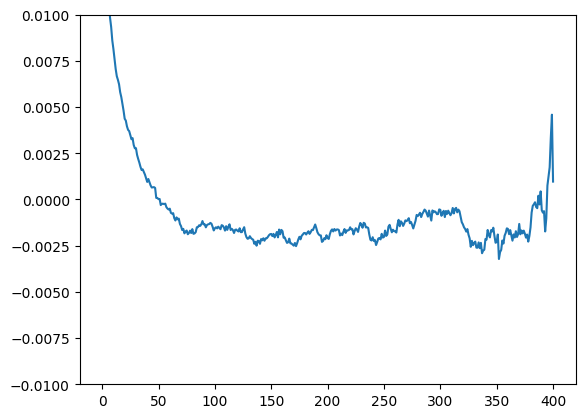

In [51]:
print("multiplier 3 system: thermalization time 250, autoc time 75")

rho_bar = thermlization(3)
plt.plot(rho_bar)
plt.ylim([1.7, 1.8])
plt.show()

result = autocorrelation(3, 200)
plt.plot(result[:])
plt.ylim([-.01, .01])
plt.show()

multiplier 3 system Nontrivial: thermalization time 100, autoc time 75
100 runs, each of 1000 steps


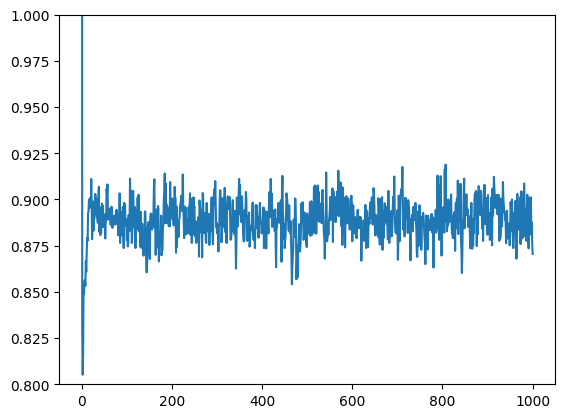

In [87]:
print("multiplier 3 system Nontrivial: thermalization time 100, autoc time 75")

rho_bar = thermlization(3, Nontrivial = True)
plt.plot(rho_bar)
plt.ylim([0.8, 1])
plt.show()

# result = autocorrelation(3, 100, Nontrivial = True)
# plt.plot(result[:200])
# plt.ylim([-.01, .01])
# plt.show()

multiplier 4 system: thermalization time 300, autoc time 75
1500 runs, each of 600 steps


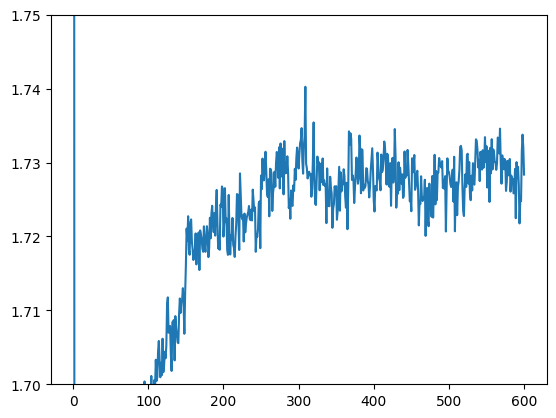

1500 runs, each of 600 steps


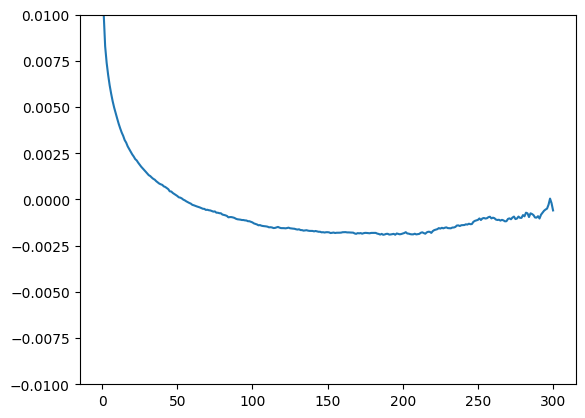

In [62]:
print("multiplier 4 system: thermalization time 300, autoc time 75")

rho_bar = thermlization(4)
plt.plot(rho_bar)
plt.ylim([1.7, 1.75])
plt.show()

result = autocorrelation(4, 300)
plt.plot(result[:])
plt.ylim([-.01, .01])
plt.show()

multiplier 4 system Nontrivial: thermalization time 100, autoc time ?
100 runs, each of 1000 steps


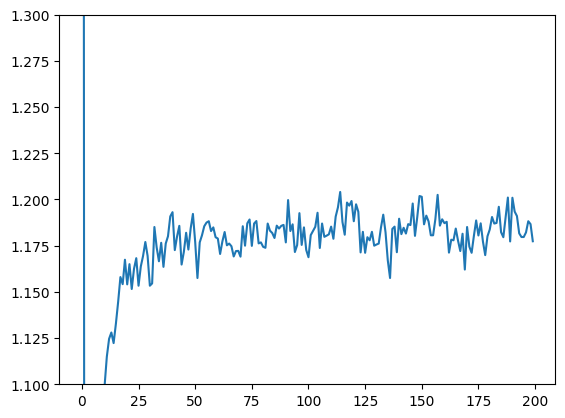

In [95]:
print("multiplier 4 system Nontrivial: thermalization time 100, autoc time ?")

rho_bar = thermlization(4, Nontrivial = True)
plt.plot(rho_bar[:200])
plt.ylim([1.1,1.3])
plt.show()

# result = autocorrelation(2, 100, Nontrivial = True)
# plt.plot(result[:200])
# plt.ylim([-.01, .01])
# plt.show()

multiplier 5 system: thermalization time 600, autoc time 75
5000 runs, each of 1000 steps


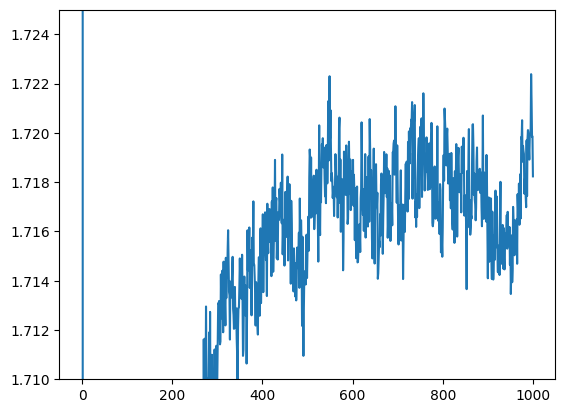

5000 runs, each of 1000 steps


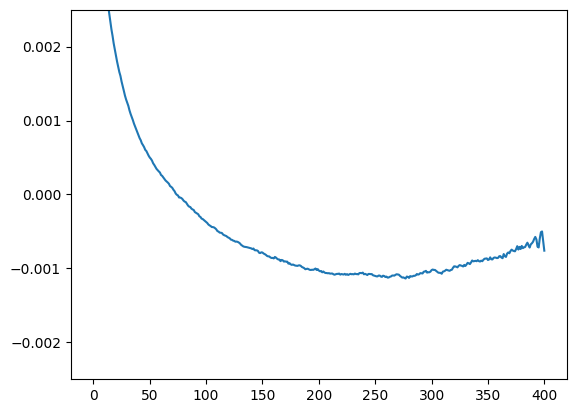

In [70]:
print("multiplier 5 system: thermalization time 600, autoc time 75")

rho_bar = thermlization(5)
plt.plot(rho_bar)
plt.ylim([1.71, 1.725])
plt.show()

result = autocorrelation(5, 600)
plt.plot(result[:])
plt.ylim([-.0025, .0025])
plt.show()

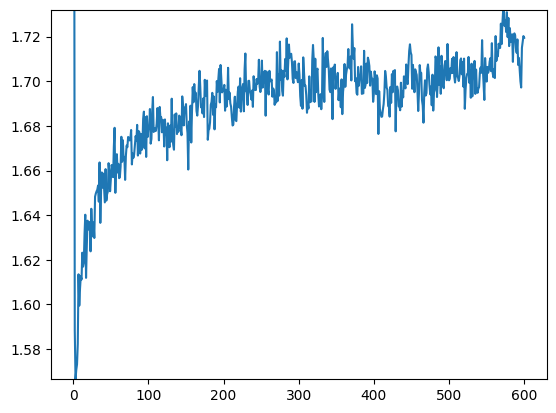

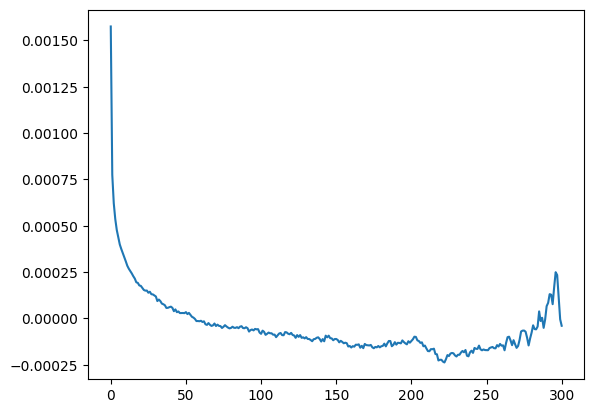

In [249]:
thermlization(6)
autocorrelation(6, 300)

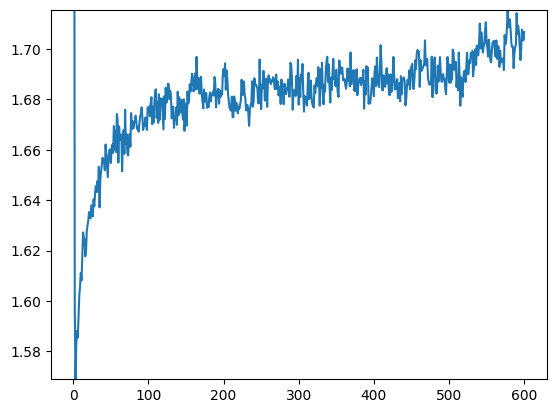

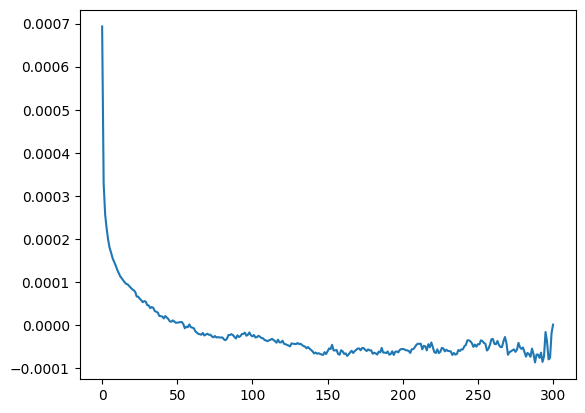

In [250]:
thermlization(9)
autocorrelation(9, 300)

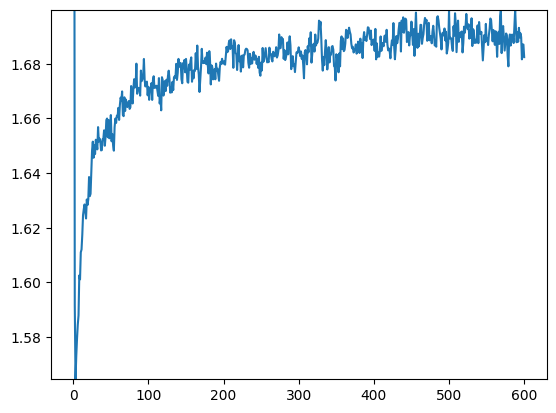

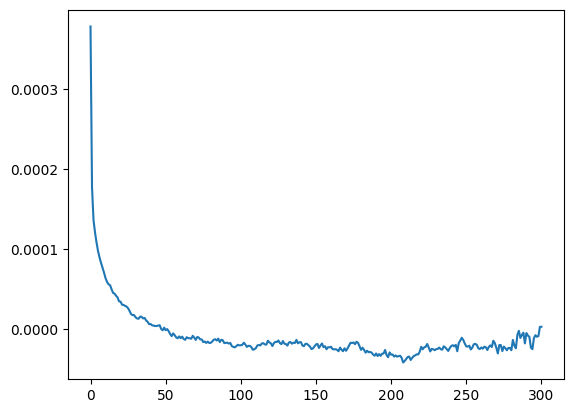

In [251]:
thermlization(12)
autocorrelation(12, 300)

In [289]:
df = pd.read_csv('autoc/N_flippable6by4.dat', header=None)

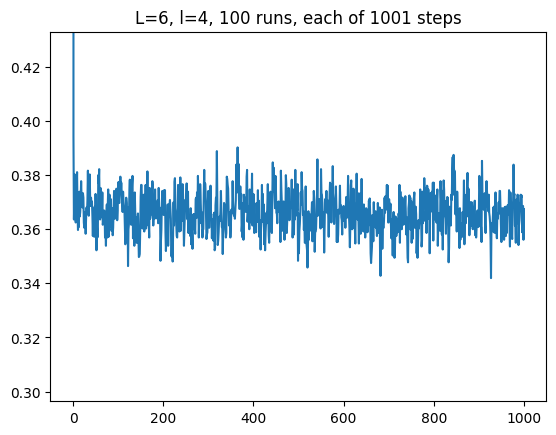

In [29]:
L = 6
l = 4
string = '../therm/N_flippable_'
string += 'L' + str(L) + 'l' + str(l) + '.dat'
rhos = pd.read_csv(string, header=None, skiprows=1).to_numpy() / (L*L)
N_runs = np.shape(rhos)[0]
N_steps = np.shape(rhos)[1]
data = np.average(rhos, axis=0)
data_max = np.max(data[int(N_steps/2):])
data_min = np.min(data[int(N_steps/2):])
data_rge = data_max-data_min

plt.title('L='+ str(L) + ', l=' + str(l) + ', ' + str(N_runs) + " runs, each of " + str(N_steps) + " steps")
plt.plot(data)
plt.ylim([data_min-data_rge, data_max+data_rge])
plt.savefig('../img/N_flippable_therm_L' + str(L) + 'l' + str(l))

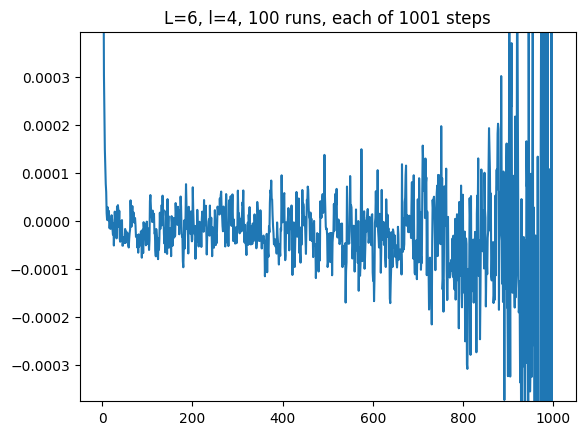

In [42]:
L = 6
l = 4
string = '../autoc/N_flippable_'
string += 'L' + str(L) + 'l' + str(l) + '.dat'
rhos = pd.read_csv(string, header=None, skiprows=1).to_numpy() / (L*L)
N_runs = np.shape(rhos)[0]
N_steps = np.shape(rhos)[1]
interval = np.shape(rhos)[1] - 1
result = np.zeros(2*(interval)+1)

for rho in rhos:
    x = rho - np.mean(rho)
    result += fft_correl(x, x)
data = result[interval:]/len(rhos)/np.arange(1+interval,0,-1)
data_max = np.max(data[int(N_steps/4):int(N_steps/2)])
data_min = np.min(data[int(N_steps/4):int(N_steps/2)])
data_rge = data_max-data_min

plt.title('autoc: L='+ str(L) + ', l=' + str(l) + ', ' + str(N_runs) + " runs, each of " + str(N_steps) + " steps")
plt.plot(data)
plt.ylim([data_min-data_rge, data_max+data_rge])
plt.savefig('../img/N_flippable_autoc_L' + str(L) + 'l' + str(l))

In [52]:
for filename in glob.glob('../therm/N_flippable_L*l*.dat'):
    filename = filename.replace('../therm/N_flippable_L', '')
    L = int(filename[:filename.find('l')])
    l = int(filename[filename.find('l')+1:filename.find('.')])
    print(L,l)

12 2
6 2
6 0
12 0
12 4
6 4
12 6
18 0
12 8
18 6
12 10
18 12


In [50]:
filename

'../therm/N_flippable_L12l2.dat'